In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
class Perceptron:
    def __init__(self, n_inputs:int, learning_rate:float):
        self.n_inputs = n_inputs
        self.learning_rate = learning_rate
        self.weights = np.random.uniform(0.0,0.01, n_inputs + 1)
        
    def train(self, inputs, output):
        guess = self.prediction(inputs)
        for i in range(self.n_inputs):
            self.weights[i+1] += self.learning_rate * (output - guess) * inputs[i]
        self.weights[0] += self.learning_rate * (output - guess)
        print(output, guess, self.weights)

    def prediction(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if weighted_sum < 0.0:
            return -1
        else:
            return 1

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [3]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


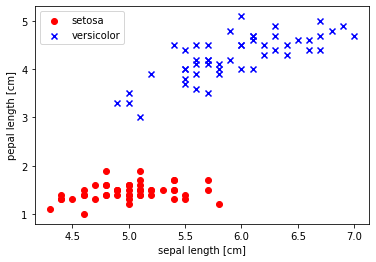

In [4]:
# select setosa and versiocolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('pepal length [cm]')

plt.legend(loc='upper left')

plt.show()

In [5]:
ppn = Perceptron(2, 0.05)

#train
n_iter = 3
for _ in range(n_iter):
    counter = 0
    for x in X:
        counter += 1
        if counter < 51:
            ppn.train(x, 1)
        else:
            ppn.train(x, -1) 

1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.00269241 0.00701922]
1 1 [0.00832802 0.0026924

In [6]:
# plot results
from enum import unique
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

/var/folders/4f/cmgmn8mj0031_c_hrw9nxc0m0000gn/T/ipykernel_42949/1312570689.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


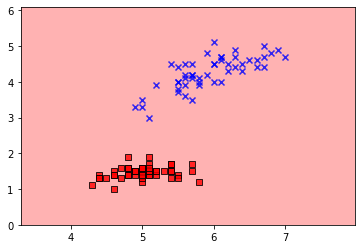

In [7]:
plot_decision_regions(X, y, classifier=ppn)

In [7]:
print(0.1 + 0.2)

0.30000000000000004


In [ ]:
L1 = ...
L2 = ...
...
n_cylcles = 10
L = [L1, L2, L3, L4] 
for i in range(n_cycles):
    for l in L:
        for w in W:
            Dw
            w = w + Dw
            